In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# 速度运动模型

速度运动模型（Velocity Motion Model）认为可以通过两个速度：一个旋转的和一个平移的速度，来控制机器人。驱动系统通常是通过这种方式控制的，包括差分驱动、阿克曼驱动和同步驱动。*不包括没有非完整约束的驱动系统，如万向轮（Mecanum wheels）的机器人或有腿机器人。*

用$\upsilon_t$表示$t$时刻的平移速度（Translation Velocity），用$\omega_t$表示旋转速度（Rotation Velocity）。因此，有：
$$u_t = \begin{bmatrix} \upsilon_t \\ \omega_t \end{bmatrix}$$
并规定，逆时针旋转为（向左转），$\omega_t$为正；向前运动，$\upsilon_t$为正。

## 1. 精确的运动

![](./img/velocity.jpg)
> 从$(x \quad y \quad \theta)^T$开始，并以恒定速度$\upsilon$和$\omega$运动的无噪声机器人完成的运动。

令$u_t = (\upsilon \quad \omega)^T$表示时刻$t$的控制，如果两种速度在整个时间间隔内$[t, t-1]$都是固定的值，则机器人以如下半径的圆运动：
$$r = \left| \frac {\upsilon}{\omega} \right|$$

这是任意半径为$r$圆形轨迹运动的对象在平移速度$\upsilon$和旋转速度$\omega$之间都遵循的一般关系：
$$\upsilon = \omega r$$

**注意：**机器人根本不旋转（$\omega = 0$）的情况，在这种情况下机器人沿直线运动，此时$r$为无穷大。

令$x_{t-1} = (x \, y \, \theta)^T$是机器人的初始位姿，并假定在$\Delta t$时间内保持速度$(\upsilon \, \omega)^T$恒定。很容易看出，圆的中心位于：
$$x_c = x - \frac {\upsilon}{\omega}sin \theta$$

$$y_c = y + \frac {\upsilon}{\omega}cos \theta$$

变量$(x_c \, y_c)^T$表示坐标。运动$\Delta t$时间后，理想机器人将位于$x_t = (x' \, y' \, \theta')^T$且：

$$\begin{bmatrix} x' \\ y' \\ \theta' \end{bmatrix} = 
\begin{bmatrix} 
x_c + \frac {\upsilon}{\omega} sin(\theta + \omega \Delta t) \\ 
y_c - \frac {\upsilon}{\omega} cos(\theta + \omega \Delta t) \\
\theta + \omega \Delta t
\end{bmatrix} = \begin{bmatrix} x \\ y \\ \theta \end{bmatrix} + 
\begin{bmatrix}
- \frac {\upsilon}{\omega} sin \theta + \frac {\upsilon}{\omega} sin(\theta + \omega \Delta t) \\ 
\frac {\upsilon}{\omega} cos \theta - \frac {\upsilon}{\omega} cos(\theta + \omega \Delta t) \\
\omega \Delta t
\end{bmatrix}
$$

尽管真实的机器人不能从一个速度跳到下一个速度，也不能保证在每一个时间间隔内速度保持恒定，利用很小的时间间隔$\Delta t$，在每一个时间间隔用一个常值近似真实的速度，是很常用的方法。

## 2. 真实运动

实际上，机器人的运动是受噪声的影响的。真实的速度与给定的速度是不同的。将这种不同建模成以$0$为中心的具有有限方差的随机变量。假定实际速度由下式给定：

$$
\begin{bmatrix}\hat \upsilon \\ \hat \omega \end{bmatrix} =
\begin{bmatrix}\upsilon \\ \omega \end{bmatrix} +
\begin{bmatrix}\varepsilon_{\alpha_1 \upsilon^2 + \alpha_2 \omega^2} \\
\varepsilon_{\alpha_3 \upsilon^2 + \alpha_4 \omega^2}\end{bmatrix}
$$

$\varepsilon_{\sigma^2}$是一个方差为$\sigma^2$，均值为$0$的误差变量。因此真实速度等于给定的速度加上一些小的，附加的误差（噪声）。在速度运动模型中，误差的标准偏差与给定速度成比例。参数$\alpha_1 \sim \alpha_4 \, ( \alpha_i \ge 0 , \, i = 1, 2, \cdots , 4)$是指定的机器人特定的误差参数。机器人的不确定性越大，这些参数就越大。

因此，在$x_{t-1} = (x \, y \, \theta)^T$执行完运动指令$u_t = (\upsilon \, \omega)^T$后的真实位姿$x_t = (x' \, y' \, \theta')^T$的较好模型为：

$$\begin{bmatrix} x' \\ y' \\ \theta' \end{bmatrix} = 
\begin{bmatrix} x \\ y \\ \theta \end{bmatrix} + 
\begin{bmatrix}
- \frac {\hat \upsilon}{\hat \omega} sin \theta + \frac {\hat \upsilon}{\hat \omega} sin(\theta + \hat \omega \Delta t) \\ 
\frac {\hat \upsilon}{\hat \omega} cos \theta - \frac {\hat \upsilon}{\hat \omega} cos(\theta + \hat \omega \Delta t) \\
\hat \omega \Delta t
\end{bmatrix}
$$

但是这个模型仍然不太现实。

## 3. 最终方向

前面给出的两个方程都精确地描述了机器人真实地在一个半径为$r = \frac {\hat \upsilon}{\hat \omega}$圆形轨迹上移动时的最终位置。但是圆形运动的假设导致了重大的退化。具体来说，密度$p(x_t \, | \, u_t, x_{t-1})$的支撑集是二维的，是三维位姿中的两维。这是因为仅使用了两个噪声变量$\upsilon$和$\omega$的直接结果。

为了推广运动模型，假设机器人到达他的最终位姿时，旋转$\hat \gamma$。因此，通过下式建模最后的方向：

$$\theta' = \theta + \hat \omega \Delta t + \hat \gamma \Delta t$$

其中：

$$\hat \gamma = \varepsilon_{\alpha_5 \upsilon^2 + \alpha_6 \omega^2}$$

这里$\alpha_5$和$\alpha_6$是确定附加的旋转噪声方差的额外的特定机器人参数。因此，得到的运动模型为：

$$\begin{bmatrix} x' \\ y' \\ \theta' \end{bmatrix} = 
\begin{bmatrix} x \\ y \\ \theta \end{bmatrix} + 
\begin{bmatrix}
- \frac {\hat \upsilon}{\hat \omega} sin \theta + \frac {\hat \upsilon}{\hat \omega} sin(\theta + \hat \omega \Delta t) \\ 
\frac {\hat \upsilon}{\hat \omega} cos \theta - \frac {\hat \upsilon}{\hat \omega} cos(\theta + \hat \omega \Delta t) \\
\hat \omega \Delta t + \hat \gamma \Delta t
\end{bmatrix}
$$

## 4. 采样函数

In [2]:
# 速度运动模型采样函数的向量版本——对粒子集进行采样
# 参数：
#   u1      - 运动控制包含两个分量：upsilon和omega
#   X0      - 粒子集
#   alpha   - 噪声系数
#   delta_t - 时间间隔
# 返回值：
#   采样后的粒子集
def sample_motion_model_velocity(u1, X0, alpha, delta_t=1):
    
    
    # 确定输入的粒子集的粒子数量
    M = X0.shape[0]
    
    # 生成随机噪声：upsilon，omega和gamma
    upsilon = np.squeeze(u1)[0]
    omega = np.squeeze(u1)[1]
    upsilon_hat = upsilon + np.random.normal(loc=0, scale=np.sqrt(alpha[0] * upsilon ** 2 + alpha[1] * omega ** 2), size=(M, 1))
    omega_hat = omega + np.random.normal(loc=0, scale=np.sqrt(alpha[2] * upsilon ** 2 + alpha[3] * omega ** 2), size=(M, 1))
    gamma_hat = np.random.normal(loc=0, scale=np.sqrt(alpha[4] * upsilon ** 2 + alpha[5] * omega ** 2), size=(M, 1))
    
    # 分解位姿的三个维度
    xs0 = X0[:,0].reshape((-1,1))
    ys0 = X0[:,1].reshape((-1,1))
    thetas0 = X0[:,2].reshape((-1,1))
    
    # 计算运动采样
    r = upsilon_hat / omega_hat
    xs1 = xs0 - r * np.sin(thetas0) + r * np.sin(thetas0 + omega_hat * delta_t)
    ys1 = ys0 + r * np.cos(thetas0) - r * np.cos(thetas0 + omega_hat * delta_t)
    thetas1 = thetas0 + omega_hat * delta_t + gamma_hat * delta_t
    
    # 堆叠粒子分量
    X1 = np.hstack([xs1, ys1, thetas1])
    
    return X1

### 运动角速度误差较大的情况：

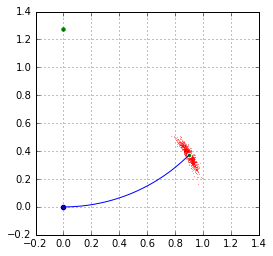

In [3]:
x ,y , theta = 0, 0, 0
v , w = 1, np.pi/4
X = np.zeros((1000, 3)) + np.array([x, y, theta]).reshape((1, 3))
u = np.array([v, w])

# noise parameter of upsilon
a1 = 0.0001
a2 = 0.0001
# noise parameter of omega
a3 = 0.01
a4 = 0.01
# noise parameter of gamma
a5 = 0.0001
a6 = 0.0001


alpha = [a1, a2, a3, a4, a5, a6]

X1 = sample_motion_model_velocity(u, X, alpha)

plt.figure(figsize=(4,4))
# 绘制初始位姿和粒子群
plt.scatter(X[0,0], X[0,1])
plt.scatter(X1[:,0], X1[:,1], c='r', s=1, lw=0, alpha=0.5)

# 绘制无噪声的运动轨迹
# 圆心
xc = x - v / w * np.sin(theta)
yc = y + v / w * np.cos(theta)
plt.scatter(xc, yc, s=20, c='g', lw=0)
# 无噪声的终点
x_end = xc + v / w * np.sin(theta + w)
y_end = yc - v / w * np.cos(theta + w)
plt.scatter(x_end, y_end, s=20, c='g', lw=1, edgecolors='w')
# 绘制无噪声的运动轨迹圆弧
xs = np.linspace(x, x_end,100)
ys = yc - np.sqrt((v / w) ** 2 - (xs - xc) ** 2)
plt.plot(xs, ys)

plt.xlim((-.2, 1.4))
plt.ylim((-.2, 1.4))
plt.grid()

### 运动速度速度误差较大的情况：

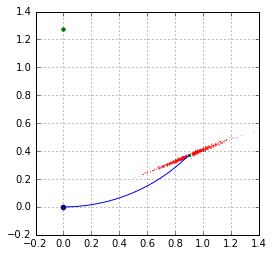

In [4]:
x ,y , theta = 0, 0, 0
v , w = 1, np.pi/4
X = np.zeros((1000, 3)) + np.array([x, y, theta]).reshape((1, 3))
u = np.array([v, w])

# noise parameter of upsilon
a1 = 0.01
a2 = 0.01
# noise parameter of omega
a3 = 0.0001
a4 = 0.0001
# noise parameter of gamma
a5 = 0.0001
a6 = 0.0001


alpha = [a1, a2, a3, a4, a5, a6]

X1 = sample_motion_model_velocity(u, X, alpha)

plt.figure(figsize=(4,4))
# 绘制初始位姿和粒子群
plt.scatter(X[0,0], X[0,1])
plt.scatter(X1[:,0], X1[:,1], c='r', s=1, lw=0, alpha=0.5)

# 绘制无噪声的运动轨迹
# 圆心
xc = x - v / w * np.sin(theta)
yc = y + v / w * np.cos(theta)
plt.scatter(xc, yc, s=20, c='g', lw=0)
# 无噪声的终点
x_end = xc + v / w * np.sin(theta + w)
y_end = yc - v / w * np.cos(theta + w)
plt.scatter(x_end, y_end, s=20, c='g', lw=1, edgecolors='w')
# 绘制无噪声的运动轨迹圆弧
xs = np.linspace(x, x_end,100)
ys = yc - np.sqrt((v / w) ** 2 - (xs - xc) ** 2)
plt.plot(xs, ys)

plt.xlim((-.2, 1.4))
plt.ylim((-.2, 1.4))
plt.grid()

### 运动线速度和角速度误差都较大的情况：

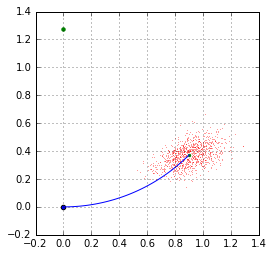

In [5]:
x ,y , theta = 0, 0, 0
v , w = 1, np.pi/4
X = np.zeros((1000, 3)) + np.array([x, y, theta]).reshape((1, 3))
u = np.array([v, w])

# noise parameter of upsilon
a1 = 0.01
a2 = 0.01
# noise parameter of omega
a3 = 0.01
a4 = 0.01
# noise parameter of gamma
a5 = 0.0001
a6 = 0.0001


alpha = [a1, a2, a3, a4, a5, a6]

X1 = sample_motion_model_velocity(u, X, alpha)

plt.figure(figsize=(4,4))
# 绘制初始位姿和粒子群
plt.scatter(X[0,0], X[0,1])
plt.scatter(X1[:,0], X1[:,1], c='r', s=1, lw=0, alpha=0.5)

# 绘制无噪声的运动轨迹
# 圆心
xc = x - v / w * np.sin(theta)
yc = y + v / w * np.cos(theta)
plt.scatter(xc, yc, s=20, c='g', lw=0)
# 无噪声的终点
x_end = xc + v / w * np.sin(theta + w)
y_end = yc - v / w * np.cos(theta + w)
plt.scatter(x_end, y_end, s=20, c='g', lw=1, edgecolors='w')
# 绘制无噪声的运动轨迹圆弧
xs = np.linspace(x, x_end,100)
ys = yc - np.sqrt((v / w) ** 2 - (xs - xc) ** 2)
plt.plot(xs, ys)

plt.xlim((-.2, 1.4))
plt.ylim((-.2, 1.4))
plt.grid()

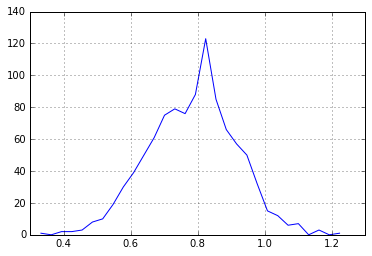

In [6]:
# 运动后，机器人位姿中角度分量的直方图分布
h, b = np.histogram(X1[:,2],bins=30)
bm = (b[:-1] + b[1:]) / 2
plt.plot(bm, h)
plt.grid()

## 5. $p(x_t \, | \, u_t, x_{t-1})$的计算

需要使用逆运动模型，从位姿$x_{t-1}$和$x_t$及最终的近似旋转$\hat \gamma$，来确定运动参数${\widehat {u}}_t = ({\widehat {\upsilon}} \, {\widehat {\omega}} )^T$。对几乎所有的$x_{t-1}$、$x_t$和$u_t$的值，如果不考虑最终旋转，运动概率很容易为零。

计算在时间单元$\Delta t$内，控制作用$u_t = (\upsilon \, \omega)^T$下将机器人位姿从$x_{t-1} = (x \, y \, \theta )^T$变成位姿$x_t = (x' \, y' \, \theta')^T$的概率$p(x_t \, | \, u_t, x_{t-1})$。

1. 首先将机器人从位姿$x_{t-1}$变到位置$(x' \, y')$，而不管机器人最终方向时所需的控制。
2. 确定机器人要获得最终方向$\theta'$需要最终旋转的$\hat \gamma$。
3. 计算出想要的$p(x_t \, | \, u_t, x_{t-1})$。

### 5.1 计算逆运动模型中的运动控制

假设机器人在$\Delta t$内移动速度是恒定的，形成一个圆形的轨迹。对一个从$x_{t-1} = (x \, y \, \theta)^T$移动到$x_t = (x' \, y')^T$的机器人，圆的中心定义为$(x^* \, y^*)^T$，由下式给出：
$$\begin{bmatrix} x^* \\ y^* \end{bmatrix} = 
\begin{bmatrix} x \\ y \end{bmatrix} + 
\begin{bmatrix} - \lambda sin \theta \\ \lambda cos \theta \end{bmatrix} =
\begin{bmatrix}
\frac {x + x'}{2} + \mu (y - y') \\
\frac {y + y'}{2} + \mu (x' - x)
\end{bmatrix}
$$
1. 第一个等式表示：圆心与机器人初始方向正交。
2. 第二个等式表示：圆心位于一条射线上，该射线过$(x \, y)^T$和$(x' \, y')^T$中点，并与两坐标之间的连线正交。

除了退化的情况（$\omega = 0$），上式有唯一解：
$$ \mu = \frac 12 \frac
{(x - x') cos \theta + (y - y') sin \theta}
{(y - y') cos \theta - (x - x') sin \theta}
$$
因此有：
$$\begin{bmatrix} x^* \\ y^* \end{bmatrix} =
\begin{bmatrix}
\frac {x + x'}{2} + \frac 12 \frac
{(x - x') cos \theta + (y - y') sin \theta}
{(y - y') cos \theta - (x - x') sin \theta}
(y - y') \\
\frac {y + y'}{2} + \frac 12 \frac
{(x - x') cos \theta + (y - y') sin \theta}
{(y - y') cos \theta - (x - x') sin \theta}
(x' - x)
\end{bmatrix}
$$

圆的半径可以由欧拉距离给定：
$$r^* = \sqrt{(x - x^*)^2+(y - y^*)^2} = \sqrt{(x' - x^*)^2+(y' - y^*)^2}$$

则方向的变化为：
$$\Delta \theta = atan2(y' - y^*, x' - x^*) - atan2(y - y^*, x - x^*)$$

其中$atan2$与$atan$的差别为：
1. $atan$函数根据斜率值计算角度，其取值范围为$-90^\circ \sim +90^\circ$，因此只能处理第一象限和第四象限的夹角。
2. $atan2$函数接受两个参数，返回值是与$x$轴正方向的夹角，这样就可以处理四个象限的任意情况了，它的值域是$-180^\circ \sim +180^\circ$。

$atan2$的函数实现为：
$$
atan2(y,x) = \begin{cases}
atan(y/x) & x > 0 \\
sign(y)(\pi - atan(|y/x|)) & x < 0 \\
0 & x = y = 0 \\
sign(y) \pi / 2 & x=0,y \ne 0
\end{cases}
$$

由于假定机器人遵循一个圆形柜机，沿该圆在$x_t$和$x_{t-1}$之间的平移距离为$\Delta dist$：
$$\Delta dist = r^* \Delta \theta$$

可以很容易地计算速度$\widehat \upsilon$和$\widehat \omega$：
$$\widehat u_t = \begin{bmatrix} \widehat \upsilon \\ \widehat \omega \end{bmatrix} = 
\Delta t^{-1} \begin{bmatrix} \Delta dist \\ \Delta \theta \end{bmatrix}$$

### 5.2 计算逆运动模型中的旋转速度

由于：
$$\theta' = \theta + \widehat \omega \Delta t + \widehat \gamma \Delta t$$

可得：
$$\widehat \gamma = \Delta t^{-1} (\theta' - \theta) - \widehat \omega$$

### 5.3 计算误差概率

运动误差来自于$\hat u_t$和$\widehat \gamma$与给定速度$u_t = (\upsilon \, \omega)^T$和$\gamma = 0$的偏差：
$$\begin{align}
\upsilon_{err} &= \upsilon - \widehat \upsilon \\
\omega_{err} &= \omega - \widehat \omega \\
\gamma_{err} &= \widehat \gamma
\end{align}$$

在指定的误差模型下，这些误差都具有如下的概率：
$$\begin{align}
\varepsilon_{\alpha_1 \upsilon^2 + \alpha_2 \omega^2}(\upsilon_{err}) \\
\varepsilon_{\alpha_3 \upsilon^2 + \alpha_4 \omega^2}(\omega_{err}) \\
\varepsilon_{\alpha_5 \upsilon^2 + \alpha_6 \omega^2}(\gamma_{err}) \\
\end{align}$$

其中$\varepsilon_{b^2}$是一个方差为$b^2$，均值为$0$的误差变量。概率$p(x_t \, | \, u_t, x_{t-1})$就是这几个误差的乘积：
$$p(x_t \, | \, u_t, x_{t-1}) = 
\varepsilon_{\alpha_1 \upsilon^2 + \alpha_2 \omega^2}(\upsilon_{err}) \centerdot 
\varepsilon_{\alpha_3 \upsilon^2 + \alpha_4 \omega^2}(\omega_{err}) \centerdot 
\varepsilon_{\alpha_5 \upsilon^2 + \alpha_6 \omega^2}(\gamma_{err}) \centerdot 
$$

In [7]:
# 正态分布概率密度函数
def prob_normal_distribution(x, sigma2):
    esp = 1e-60
    p =  ((2 * np.pi * sigma2) ** 0.5) * np.exp(- 0.5 * x**2 / sigma2)
    p[np.isnan(p)] = esp
    p[p < esp] = esp
    return p

def motion_model_velocity(X1, u, X0, alphas, delta_t=1):
    esp = 1e-10
    # 将X1、u、X0分解为向量
    xs0 = X0[:,0].reshape((-1,1))
    ys0 = X0[:,1].reshape((-1,1))
    thetas0 = X0[:,2].reshape((-1,1))
    
    xs1 = X1[:,0].reshape((-1,1))
    ys1 = X1[:,1].reshape((-1,1))
    thetas1 = X1[:,2].reshape((-1,1))
    
    upsilon = np.squeeze(u)[0]
    omega = upsilon = np.squeeze(u)[1]
    
    # 步骤1: 计算逆运动控制模型的运动控制
    mu = 0.5 * \
        ((xs0 - xs1) * np.cos(thetas0) + (ys0 - ys1) * np.sin(thetas0)) /  \
        ((ys0 - ys1) * np.cos(thetas0) - (xs0 - xs1) * np.sin(thetas0) + esp)
    x_inv = (xs0 + xs1) / 2 + mu * (ys0 - ys1)
    y_inv = (ys0 + ys1) / 2 + mu * (xs1 - xs0)
    radius_inv = np.sqrt((xs0 - x_inv) ** 2 + (ys0 - y_inv) ** 2)
    delta_theta = np.arctan2(ys1 - y_inv, xs1 - x_inv + esp) - \
                    np.arctan2(ys0 - y_inv, xs0 - x_inv + esp)
    
    # 步骤2：计算运动噪声来源
    upsilon_inv = delta_theta * radius_inv / delta_t
    omega_inv = delta_theta / delta_t
    gamma_inv = (thetas1 - thetas0) / delta_t - omega_inv
    
    # 步骤3：计算概率
    err_upsilon = upsilon - upsilon_inv
    var_upsilon = alphas[0] * upsilon ** 2 + alphas[1] * omega ** 2
    
    err_omega = omega - omega_inv
    var_omega = alphas[2] * upsilon ** 2 + alphas[3] * omega ** 2
    
    err_gamma = gamma_inv
    var_gamma = alphas[4] * upsilon ** 2 + alphas[5] * omega ** 2
    
    # 计算概率
    return prob_normal_distribution(err_upsilon, var_upsilon) * \
           prob_normal_distribution(err_omega, var_omega) * \
           prob_normal_distribution(err_gamma, var_gamma)

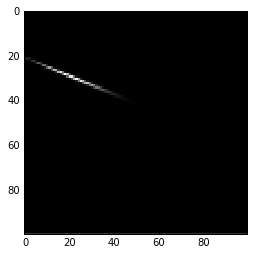

In [8]:
N = 100
x ,y , theta = 0, 0, 0
v , w = 1, np.pi/4
X0 = np.zeros((N**2, 3)) + np.array([x, y, theta]).reshape((1, 3))
u = np.array([v, w])

# noise parameter of upsilon
a1 = 0.01
a2 = 0.01
# noise parameter of omega
a3 = 0.01
a4 = 0.01
# noise parameter of gamma
a5 = 0.0001
a6 = 0.0001
alpha = [a1, a2, a3, a4, a5, a6]

xs, ys = np.meshgrid(np.linspace(0.5, 1.5, N), np.linspace(0, 1, N))
tensor0 = np.zeros((N, N, 2))
tensor0[:,:,0] = xs
tensor0[:,:,1] = ys

X1 = np.hstack([tensor0.reshape((-1,2)), np.zeros((N ** 2, 1)) + w + theta])

ps = motion_model_velocity(X1, u, X0, alpha)

ps_matrix = ps.reshape((N, N))
# 绘制初始位姿和粒子群

plt.imshow(ps_matrix, cmap='gray', interpolation='none')

# fig = plt.figure('3D surface')
# ax = fig.add_subplot(1, 1, 1, projection='3d')
# ax.plot_surface(xs, ys, ps_matrix, alpha=0.7, cmap='winter', rstride=1, cstride=1, lw=0)
# # ax.scatter3D(xs, ys, ps_matrix, s=1, lw=0)